## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Data Exploration

We start by loading the data and trying to get familiar with the structure of the data and do some exploratory analysis. At this stage we explore the characteristics of each variable in the data and assess their significance. From this step we may decide to drop some features or add some more features to the data. Data exploration will also give us insights about pre-processing the data.

In [2]:
tweets_df = pd.read_csv('twitter.csv')
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


We see the detail information of the dataframe. There are 31962 entries and 3 columns. The id column only corresponds to the number of entries or samples. So we can drop the id column in the next step.

In [4]:
tweets_df = tweets_df.drop(['id'], axis = 1)
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


Now let us check for the null elements using heatmap. If there are null elements present in the data we will be able to see it from the heatmap. Then we will take a look at the histogram of the dataframe.

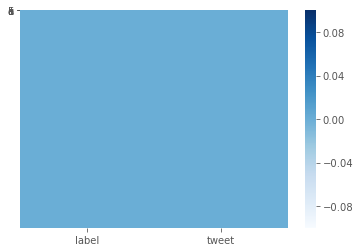

In [5]:
sns.heatmap(tweets_df.isnull(), yticklabels = 'False', cbar = 'False', cmap = 'Blues')

So a further confirmation that there are no null elements present in our dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244DA3AF2C8>]],
      dtype=object)

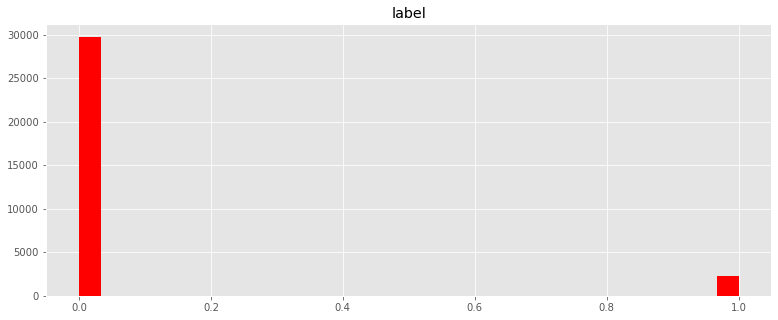

In [6]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

It is clear from the histogram plot that the dataset is unbalanced. There are significantly large disproportion between the number of positive comments (i.e., label 0) and the number of negative comments (i.e., label 1). Now let's try the same plot with seaborn.

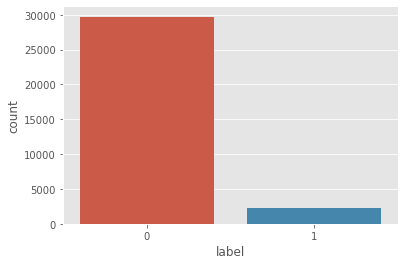

In [7]:
sns.countplot(tweets_df['label'], label = 'Count')

It gives the same result plot of unbalanced dataset. At this phase of our data exploration we would like to add an additional feature to our dataframe, which is the length of the tweets or comments. We are going to take the length of each comment and store them in an additional column named 'length' and add this to our dataframe.

In [8]:
tweets_df['length'] = tweets_df['tweet'].apply(len)
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


So an additional column of tweet length was added to the dataframe. Now we would like to explore the length column. How the histogram of this specific column looks like. It can give us the idea of the average comment length of the users, the maximum and as well as minimum comment length.

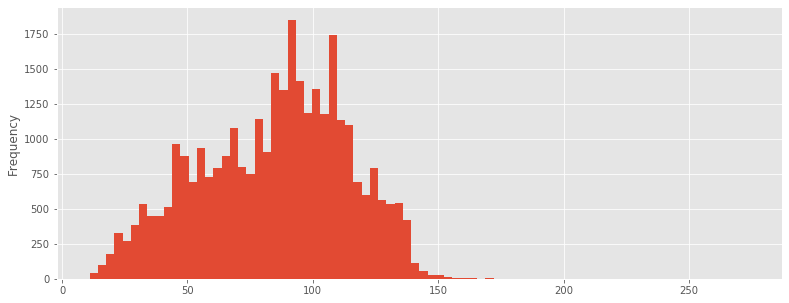

In [9]:
tweets_df['length'].plot(bins = 80, figsize = (13,5), kind = 'hist')

In [10]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


So, we see that on average a comment or tweet is almost 85 characters long. The shortest comment is 11 characters and the longest is 274 characters. So, just out of curiosity we are going to have a look at the shortest, longest and an average comment.

In [11]:
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]           #shortest comment

'i love you '

In [12]:
tweets_df[tweets_df['length'] == 274]['tweet'].iloc[0]         #longest comment

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [13]:
tweets_df[tweets_df['length'] == 85]['tweet'].iloc[0] 

' â\x86\x9d #under the spell of brexit referendum - commerzbank   #blog #silver #gold #forex'

Now we split the positive and negative comments and save them to two new variables.

In [14]:
positive_comments = tweets_df[tweets_df['label'] == 0]
positive_comments

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [15]:
negative_comments = tweets_df[tweets_df['label'] == 1]
negative_comments

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


We explore the data further using wordcloud. But for that we need to join all the tweets into one string. After doing that we can use the wordcloud library to visualize which words are most frequent in both positive and negative comments.

In [16]:
!pip install WordCloud
from wordcloud import WordCloud

In [17]:
sentences = tweets_df['tweet'].tolist()                     #convert the tweets into list
joined_sentences = ' '.join(sentences)                    #join all the sentences into one string

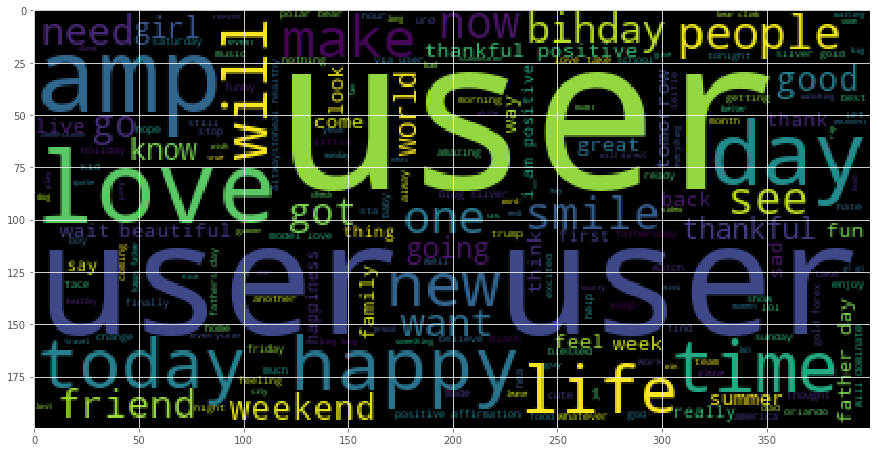

In [18]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(joined_sentences))

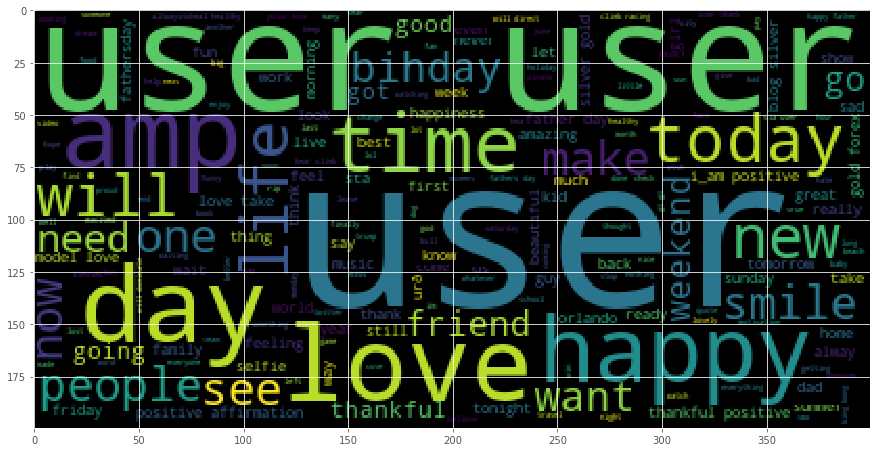

In [19]:
pos_sentences = positive_comments['tweet'].tolist()                     #convert the tweets into list
joined_pos_sentences = ' '.join(pos_sentences)            #join all the sentences into one string
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(joined_pos_sentences))

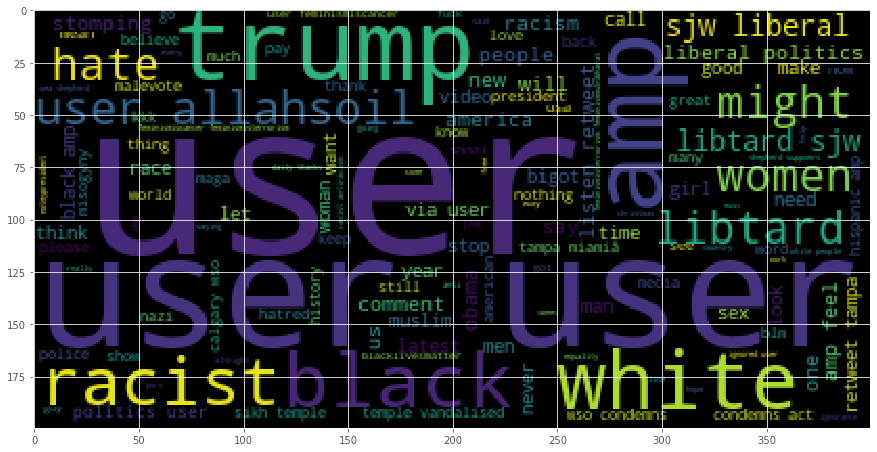

In [20]:
neg_sentences = negative_comments['tweet'].tolist()                     #convert the tweets into list
joined_neg_sentences = ' '.join(neg_sentences)            #join all the sentences into one string
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(joined_neg_sentences))

## Perform Data Cleaning and Count Vectorization

Data cleaning will play a very important role in this project as in natural language processing we are not interested in many of the features that are present in the comments such as, the term user, the punctuations, the stopwords as well.

Then we will convert the text data into numbers by means of count vectorization or tokenization. We want to train our machine learning model based on this tokenized version of our pre-processed data.

In [21]:
import re

def username_remover(input_txt, username):
    
    """removes the username handle from the data"""
    
    r = re.findall(username, input_txt)
    
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [22]:
tweets_df['user_removed'] = np.vectorize(username_remover)(tweets_df['tweet'], "@[\w]*")

In [23]:
tweets_df.head()

,label,tweet,length,user_removed
0,0,@user when a father is dysfunctional and is s...,102,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,122,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,21,bihday your majesty
3,0,#model i love u take with u all the time in ...,86,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,39,factsguide: society now #motivation


The username handle from the data is removed.

In [24]:
import string
import nltk #natural language toolkit
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
def cleaner(comment):
    
    """function to perform cleaning of the text data. For any comment
    input the function cleans the punctuations and stopwords."""
    
    punctuation_removed = [char for char in comment if char not in string.punctuation]
    punctuation_removed_join = ''.join(punctuation_removed)
    stops_removed = [word for word in punctuation_removed_join.split() if word.lower() not in stopwords.words('english')]
    
    return stops_removed

In [26]:
tweets_df['clean_tweet'] = tweets_df['user_removed'].apply(cleaner)

Now we would like to see the changes that have been made in the data and if the changes make sense or not. After the cleaning process is done we can move on to classifying the sentiments into positives and negatives.

In [27]:
tweets_df.head()

,label,tweet,length,user_removed,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,when a father is dysfunctional and is so sel...,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,@user @user thanks for #lyft credit i can't us...,122,thanks for #lyft credit i can't use cause th...,"[thanks, lyft, credit, cant, use, cause, dont,..."
2,0,bihday your majesty,21,bihday your majesty,"[bihday, majesty]"
3,0,#model i love u take with u all the time in ...,86,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, urð±, ðð..."
4,0,factsguide: society now #motivation,39,factsguide: society now #motivation,"[factsguide, society, motivation]"


We can clearly see the difference that has been made due to our cleaning process. All the unwanted words are removed leaving us with only the keywords from all the texts. We can use this data to train our model. But first we have to apply count vectorization to get our training data.

In [28]:
vectorizer = CountVectorizer(analyzer = cleaner)
tokenized_tweets = vectorizer.fit_transform(tweets_df['clean_tweet'])

In [29]:
tokenized_tweets.shape

(31962, 28409)

The first axis of the tokenized_tweets represents the number of samples and the second axis represents the number of unique words. This will be our training data X and our training label y can be extracted from the tweets_df object.

In [30]:
X = tokenized_tweets

In [31]:
y = tweets_df['label']

## Train the model using a Naive-Bayes Classifier

Naive-Bayes classifier is a classification technique based on Bayes Theorem. This machine learning algorithm relies on calculation of prior probability, likelihood and the marginal likelihood to calculate the probability of a data sample belonging to a certain class.

In [32]:
print(X.shape)
print(y.shape)

(31962, 28409)
(31962,)


Splitting the dataset into train and test parts.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

After the train test split is done, we fit a naive bayes classifier to the train data.

In [34]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Evaluating the Naive-Bayes Classifier Performance

We evaluate the classification performance with confusion matrix, precision, recall and F1 score.

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
!pip install matplotlib==3.1.2 --user

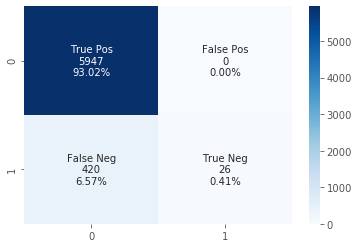

In [51]:
#Prediciting the test results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

The plot of the confusion matrix clearly shows the result. The classifier can properly classify 93% of the positive comments but poorly classifies the negative comments. This is an expected behavior since we are dealing with an imbalanced dataset where the number of positive comments are far more than the number of negative comments. That is the reason why the model has been able to properly classify most of the positive comments. We can look at the classification report into the precision, recall and F1 scores for better understanding the results.

In [40]:
#Classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      5947
           1       1.00      0.06      0.11       446

    accuracy                           0.93      6393
   macro avg       0.97      0.53      0.54      6393
weighted avg       0.94      0.93      0.91      6393



From the classification report we see similar results. The F1 score shows that the classifier is able to classify the positive comments very well, but the ability to classify the negative comments is really low. This can be further improved by upsampling the amount of negative comments in the data or also by trying out a whole different classifier.

In [58]:
import wordcloud
print(wordcloud.__version__)

1.8.0
